## Burning forests exercise
* Imagine you are the UN ambassador for climate change.
* It is pretty hard position since you cannot really do anything about the climate change.
* Which is claimed by scientist to be responsible for the more extreme weather patters.
* One of your goals is to find low hanging fruits in combating climate change.
* One immediate problem is the uprise intense fires all over the world.
* So you got an idea. Some part of the fires are clearly caused by arsonist.
* Instead of climate change, you could maybe identify countries which are 'soft' on arson related crimes
* If you then push them to change it (which would be cheap), you could save lots of CO2 emission, lives and money.

## In this exercise you will try to identify countries which might be potentially soft on arson crime.

---
---
# In case this is your first Jupyter Notebook:
* Every cell is executed after hitting Shift-Enter, once your cursor is in it.
* After successul run, a serial number of the execution will appear on the left from the cell
* For cell execution and creation of a new cell below, use Alt-Enter.
* Any text after a # symbol is so-called comment (to annotate your code) and is ignored by Python
* CAUTION: If you execute a cell which has a hint in the output, the hint will disappear, therefore it is better to use Alt-Enter.
---
---

In [1]:
# imports of modules we need
import pandas as pd  # probably the most used module for data science working with lots of data organized in tables
import wbgapi as wb  # module which allows to download and import data from the World Bank using its API

import matplotlib.pyplot as plt  # Standard plotting module
from matplotlib_venn import venn2, venn3  # specific module for plotting venn diagrams

## Sidenote:
* In these types of tasks, collecting correct and reliable data is a time and effort demanding work.
* We can never be sure that our data is 100% correct.
* Besides, some data are missing (which we did not tackle properly here), how important do you think it is for our world to flourish to have all the data for all the countries available?
### These considerations are extremely important, especially with a responsibility and weight of the position of UN ambassador.
---

## We combined data from various sources:
* Scientifically analysed data from MODIS observations serve as resource for:
    1. tree cover for every country, just a single number for simplicity (in hectares). 
    2. Land area burned between years 2012-2020 (I sum all years upto 1 number again, in hectares)

# Notes on the data in your table.
* Scientifically analysed data from MODIS observations serve as resource for:
    1. MODIS stands for Moderate Resolution Imaging Spectroradiometer (on-board on NASA's Terra and Aqua satellites)
    2. Available for example from Global Forest Watch ([GFW](https://www.globalforestwatch.org/dashboards/global/?burnedAreaCumulative=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMS0wMS0wNCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTItMjcifQ%3D%3D&burnedAreaRanked=eyJoaWdobGlnaHRlZCI6ZmFsc2V9&category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Iiwid2lkZ2V0U2V0dGluZ3MiXSwic2V0dGluZ3MiOnsic2hvd1Byb21wdHMiOnRydWUsInByb21wdHNWaWV3ZWQiOlsidmlld05hdGlvbmFsRGFzaGJvYXJkcyIsImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJzaGFyZVdpZGdldCJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbInZpZXdOYXRpb25hbERhc2hib2FyZHMiLCJkb3dubG9hZERhc2hib2FyZFN0YXRzIl0sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBJbmRleCI6MCwic3RlcHNLZXkiOiJzaGFyZVdpZGdldCJ9LCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0Iiwic3RlcEluZGV4IjowLCJvcGVuIjpmYWxzZSwiZm9yY2UiOnRydWV9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsImZvcmNlIjp0cnVlfQ%3D%3D&fireAlertStats=eyJjb21wYXJlWWVhciI6MjAxM30%3D&gfwfires=true&location=WyJnbG9iYWwiXQ%3D%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTEuMjkwOTMyMzMxMzg1NzksImxuZyI6MTcuOTA4NjI4NDY0OTc4Njk4fSwiem9vbSI6NC42NDA1NTQxNzQ2MjMzNjQ1LCJkYXRhc2V0cyI6W119))
    3. Column of 'forest_area_ha' for every country, just a single number (not changing over time) for simplicity (in hectares).
    4. Column 'burned_area_ha' of forests burned between years 2012-2020 (I sum all years upto 1 number again, in hectares)
* Temperature changes might contribute to the increase fires too, such data are colleted from Food and Agriculture Organization of the United Nations [FAO](http://www.fao.org/faostat/en/#data/ET)
    1. There you can download temperature changes for each country in respect to a base level, which is given as average of temperatures between years 1951-1980.
    2. Data are originally per month for all years.
    3. We averaged them over months and years between 2012-2020 into column 't_change'
* Lack of precipitations could justify large fires
    1. Therefore we have column 'av_prec' in mm per year (again single constant for all years)
    2. Available from [UNdata](http://data.un.org/Data.aspx?d=CLINO&f=ElementCode%3A06)
* General development level of each countries will certainly matter
    1. We measure it here by GDP per capita (for 2020) in dollars (column 'gdp_per_capita')
    2. Data obtained from [World Bank](https://data.worldbank.org/indicator)
* In order to compare similar contries we could pick continents one by one
* Or alternatively use four level division developed by [Hans Rosling](https://www.gapminder.org/factfulness-book/) and [Gapminder](https://www.gapminder.org/), debanking the myth of poor south and rich north or simply US and THEM.
    1. column 'level'
    


# Loading precompiled data table

In [2]:
df = pd.read_csv('data_fires.csv')
df.set_index('iso', inplace=True)

In [3]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha
iso,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87


## Find percentage of forest burnt

In [4]:
df['ratio_burn'] = df['burned_area_ha']/df['forest_area_ha']

In [5]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075


# Try Europe first
## Quantiles
* Quantiles are values out of group of values, which split the group into ratio
* Example: quantile(0.6) is a value, where 60% of values lie below, and 40% of values lie above

In [6]:
# select european countries
df_europe = df[df.Region=='Europe']

In [7]:
# forest burned
high_burn_limit = df_europe.ratio_burn.quantile(0.7)  # value separates 30% of countries with high forest burns
high_burn_df = df_europe[df_europe.ratio_burn > high_burn_limit]  # select those 30&% using a condition > value
set_high_burn = set(high_burn_df.index)  # make a set of countries out of the table

In [8]:
# not high temperature change
t_change_limit = df_europe.t_change.quantile(0.5)
not_large_t_change_df = df_europe[df_europe.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [9]:
# not low precipitation
prec_limit = df_europe.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_europe[df_europe.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

### NOTE: There is no strict rule which quantile to use, feel free to experiment

In [10]:
# intersection betwee two sets
# Countries which have high burns AND temperature rise is below average over the decades
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [11]:
# using .loc on our df, we can select countries of inter2 from the original df
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
ROU,Romania,Europe,1.87,637.0,1.906703e+08,166211.39,0.000872
PRT,Portugal,Europe,1.38,854.0,7.164405e+07,15899.65,0.000222
MNE,Montenegro,Europe,1.74,241.0,1.066819e+07,3809.97,0.000357
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,4.085507e+07,28669.33,0.000702


## Temperature is only one factor
* Extremely low precipitations might justify lots of burned forest
* Let's add the condition that the precipitations cannot be too low
* Now our logic says: high burns AND not large temperature increase AND not very low precipitations

In [12]:
# intersection of three sets
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [13]:
# listing the countries from the original df
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
PRT,Portugal,Europe,1.38,854.0,71644045.43,15899.65,0.000222
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,40855066.35,28669.33,0.000702


In [14]:
# list all high burning countries
df.loc[set_high_burn].Country

iso
HRV                   Croatia
HUN                   Hungary
PRT                  Portugal
BLR                   Belarus
MNE                Montenegro
UKR                   Ukraine
ROU                   Romania
BIH    Bosnia and Herzegovina
Name: Country, dtype: object

## Plotting venn diagram
* using functions from matplotlib_venn module, we can visualize how our set share the elements (Countries)

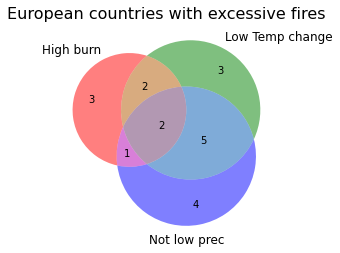

In [15]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('European countries with excessive fires', fontsize=16)
plt.show()

* Our motivation was to identify the intersection of the three sets shown in dark purple here
* There are several other subsets which you can find by using UNION/INTERSECTION methods.
* What do they logically represent and are they of any use for the UN secretary?

---
---
## Comparing all countries together feels wrong, because of huge differences between them.
* There is no unique answer how to group countries, consider options based on:
  * development level (GDP)
  * Geography
  * Climate
  * And more
* Here we will try to use the GDP per capita, to compare fires in similarly developed states.
* Above, Europe can be considered fairly homogeneous, thanks to its small size and EU integration.
---
---

## Let's organize countries according to the GDP per capita

In [16]:
# using wb module, we can load lots of datasets directly into pandas dataframes (tables)
gdp = wb.data.DataFrame('NY.GDP.PCAP.CD', time=2020)
gdp.index.names = ['iso']  # rename the index
df = df.merge(gdp, on='iso')  # merging our two tables according to 'iso' index

In [17]:
# and rename gdp column
df = df.rename(columns={'NY.GDP.PCAP.CD':'gdp_per_capita_dollars'})

In [18]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars
iso,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119


In [19]:
# example, what is the dollar per year money, people in the 10 percent of poorest countries live on in average?
df['gdp_per_capita_dollars'].quantile(0.1)

817.035756926923

In [20]:
# in dollars per day
df['gdp_per_capita_dollars'].quantile(0.1)/365

2.238454128566912

## Extreme poverty is defines as living with less than 2 dollars a day.
* As mentioned in the initial notes, the world is not US and THEM any more, but can be more described by four levels of countries' wealth
* levels go from the poverty line of 2$ a day, and then multiply by 4 to reach the next level
* So we have 2, 8, 32 dollars per day levels
* In which level are you?

In [21]:
# We need to mark our countries according to these levels in our df
# let's make all countries level 4 first
df['gdp_level'] = 4

In [22]:
# Now if the gdp per capita is lower than of the level 1,2 or 3, we change the value of gdp_level
# gdp is per year, so we have to multiply the level per day by 365
df.loc[df['gdp_per_capita_dollars'] < 365*32, 'gdp_level'] = 3
df.loc[df['gdp_per_capita_dollars'] < 365*8, 'gdp_level'] = 2
df.loc[df['gdp_per_capita_dollars'] < 365*2.5, 'gdp_level'] = 1

In [23]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409,1
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869,2
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752,3
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439,3
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119,3


In [24]:
# how many countries (rows) do we have in df
len(df)

119

In [25]:
# leaving out rows with any missing data
# Proper approach is to try to find additional sources for the missing data
df.dropna(inplace=True)

In [26]:
# Out of 195 countries, we are omitting many people of this world.
len(df)

111

In [27]:
# How many countries we have at each GDP level?
# apply value_counts() method on column gdp_level
df.gdp_level.value_counts()

3    40
4    29
2    27
1    15
Name: gdp_level, dtype: int64

# Level 1 countries analysis
* here we repeat the same steps as we did for Europe
* Now it includes whole world, grouped by GDP

In [28]:
df_l1 = df[df['gdp_level']==1]

In [29]:
# lots of forest burned
high_burn_limit = df_l1.ratio_burn.quantile(0.7)
high_burn_df = df_l1[df_l1.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [30]:
# not high temperature change
t_change_limit = df_l1.t_change.quantile(0.5)
not_large_t_change_df = df_l1[df_l1.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [31]:
# not low precipitation
prec_limit = df_l1.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l1[df_l1.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [32]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [33]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
TCD,Chad,Africa,1.10,322.0,9.050136e+08,1975335.80,0.002183,614.465190,1
MLI,Mali,Africa,1.08,282.0,9.800557e+08,2986561.72,0.003047,858.915805,1


In [34]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [35]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,


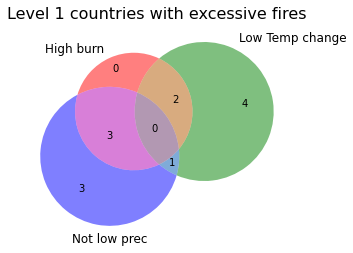

In [36]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 1 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 1:
* It seems that no country stands out as for getting too many fires at favourable climate
* Fire extend for Mali and Chad seems to be justified by low precipitations

# Level 2 countries analysis

In [37]:
df_l2 = df[df['gdp_level']==2]

In [38]:
# forest burned
high_burn_limit = df_l2.ratio_burn.quantile(0.7)
high_burn_df = df_l2[df_l2.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [39]:
# not high temperature change
t_change_limit = df_l2.t_change.quantile(0.5)
not_large_t_change_df = df_l2[df_l2.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [40]:
# not low precipitation
prec_limit = df_l2.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l2[df_l2.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [41]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [42]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2


In [43]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [44]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2


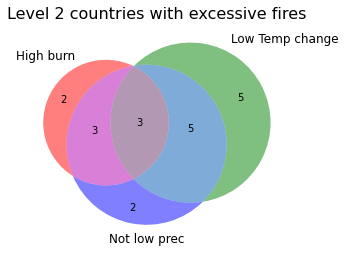

In [45]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 2 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 2:
* Lack of precipitation is not a reason for the strong fires.
* UN general law department might want to have a deeper look here for some easy gains.

# Level 3 countries analysis

In [46]:
df_l3 = df[df['gdp_level']==3]

In [47]:
# forest burned
high_burn_limit = df_l3.ratio_burn.quantile(0.7)
high_burn_df = df_l3[df_l3.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [48]:
# not high temperature change
t_change_limit = df_l3.t_change.quantile(0.5)
not_large_t_change_df = df_l3[df_l3.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [49]:
# not low precipitation
prec_limit = df_l3.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l3[df_l3.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [50]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [51]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3
MEX,Mexico,Americas,1.12,758.0,1.561484e+09,1461080.92,0.000936,8346.702379,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3


In [52]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [53]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3


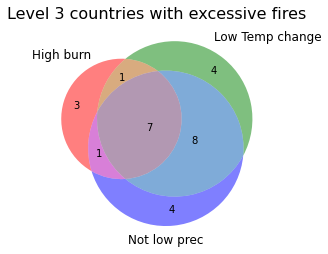

In [54]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 3 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 3:
* Lack of precipitation removed only Mexico from the list.
* UN general law department might want to have a deeper look into these 7 countries.

# Level 4 countries analysis

In [55]:
df_l4 = df[df['gdp_level']==4]

In [56]:
# forest burned
high_burn_limit = df_l4.ratio_burn.quantile(0.7)
high_burn_df = df_l4[df_l4.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [57]:
# not high temperature change
t_change_limit = df_l4.t_change.quantile(0.5)
not_large_t_change_df = df_l4[df_l4.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [58]:
# not low precipitation
prec_limit = df_l4.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l4[df_l4.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [59]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [60]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
AUS,Australia,Oceania,1.11,534.0,6.150331e+09,6922165.61,0.001125,51812.154037,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4


In [61]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [62]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4


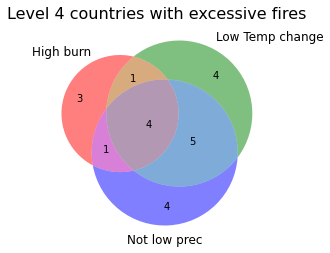

In [63]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 4 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 4:
* Central America seems to have potential to reduce forest fires.
* Or maybe there is something more specific going on there?
* I do not know enough about central America, so let me know your thoughts.

# Conclusions:
* You have learnt a lot in this exercise, especially about the power of working with tables using pandas module
* And doing it with real world data, compiled from various sources.
* As life itself, it is an open end problem, if you have ides how to improve what we have done, it could actually save lives.
---
# GOOD job everyone!!!